## Выполнил: Салтыков Вадим Евгеньевич

## Группа: 18-ИВТ-3

## Вариант №5

## Метеоритная защита земли

#### 1. Определите местоположение появления метеорита с наибольшим количеством высвободившейся энергии.
#### 2. Определите метеорит с максимальной и минимальной скоростью.
#### 3. Определите место максимальной концентрации метеоритов.
#### 4. Определите время года, в которое вероятность появления метеоритов максимальна. Постройте график.
#### 5. Удалить строки данных, в которых для метеоритов не указана скорость.
#### 6. Построить график, на котором по оси ОХ отложено время суток, по OY – частота появления метеоритов.
#### 7. Заполните строки в которых для метеоритов не указана скорость.
#### 8. Определить месяц года, для которого появление метеоритов наиболее вероятно (построить необходимые графики).


***

#### 1. Определите местоположение появления метеорита с наибольшим количеством высвободившейся энергии.

In [5]:
import pandas as pd
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt 
file = pd.read_csv('cneos_fireball_data.csv', header=0)
file

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.190
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.120
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.230
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.290
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.520
...,...,...,...,...,...,...,...,...,...,...
714,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092
715,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130
716,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400
717,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200


In [7]:
first_paragraph = file.sort_values(by=['Total Radiated Energy (J)'], ascending = False).head(1)
first_paragraph

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
146,2013-02-15 03:20:33,54.8N,61.1E,23.3,18.6,12.8,-13.3,-2.4,3.750000e+14,440.0


#### 2. Определите метеорит с максимальной и минимальной скоростью.

In [8]:
second_paragraph_min_velocity = file.sort_values(by=['Velocity (km/s)'], ascending = True).head(1)
second_paragraph_min_velocity

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
300,2008-07-01 17:40:19,37.1N,115.7W,36.1,9.8,2.8,1.7,-9.2,3.600000e+10,0.12


In [9]:
second_paragraph_max_velocity = file.sort_values(by=['Velocity (km/s)'], ascending = False).head(1)
second_paragraph_max_velocity

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
67,2015-07-04 01:40:11,38.6N,103.1E,46.3,49.0,0.9,-40.4,-27.7,5.600000e+10,0.18


#### 3. Определите место максимальной концентрации метеоритов.

In [6]:
third_paragraph = seventh_paragraph.groupby(seventh_paragraph.columns.drop('Latitude (deg.)').tolist(), as_index=False).agg(list)
from scipy.stats import pearsonr
latitude = third_paragraph["Latitude (deg.)"] 
longitude = third_paragraph["Longitude (deg.)"]
print(latitude, longitude)

0          [5]
1          [5]
2          [5]
3          [5]
4          [5]
        ...   
714    [64.0S]
715     [0.8N]
716     [1.0N]
717    [14.5N]
718     [3.7N]
Name: Latitude (deg.), Length: 719, dtype: object 0          5
1          5
2          5
3          5
4          5
       ...  
714    97.3E
715    97.6E
716    98.3E
717    98.9E
718    99.7E
Name: Longitude (deg.), Length: 719, dtype: object


#### 4. Определите время года, в которое вероятность появления метеоритов максимальна. Постройте график.

In [11]:
fourth_paragraph = pd.read_csv("cneos_fireball_data.csv", parse_dates=[0], infer_datetime_format=True)
temp = pd.DatetimeIndex(fourth_paragraph['Peak Brightness Date/Time (UT)']) 
fourth_paragraph['Date'] = temp.date 
fourth_paragraph['Time'] = temp.time 
del fourth_paragraph['Peak Brightness Date/Time (UT)'] 
fourth_paragraph

,Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),Date,Time
0,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.190,2017-07-31,22:01:35
1,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.120,2017-07-23,06:12:38
2,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.230,2017-07-13,09:30:36
3,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.290,2017-06-30,14:26:45
4,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.520,2017-06-23,20:21:55
...,...,...,...,...,...,...,...,...,...,...,...
714,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092,1993-11-29,17:48:41
715,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130,1993-10-31,03:39:27
716,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400,1991-10-04,09:22:47
717,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200,1990-10-01,03:51:47


In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
exmpl1 = fourth_paragraph
exmpl1.drop(['Latitude (deg.)', 'Longitude (deg.)', 'Altitude (km)','Velocity (km/s)','vx','vy','vz'], inplace=True, axis=1)
exmpl1

,Total Radiated Energy (J),Calculated Total Impact Energy (kt),Date,Time
0,5.800000e+10,0.190,2017-07-31,22:01:35
1,3.500000e+10,0.120,2017-07-23,06:12:38
2,7.300000e+10,0.230,2017-07-13,09:30:36
3,9.400000e+10,0.290,2017-06-30,14:26:45
4,1.840000e+11,0.520,2017-06-23,20:21:55
...,...,...,...,...
714,2.600000e+10,0.092,1993-11-29,17:48:41
715,4.000000e+10,0.130,1993-10-31,03:39:27
716,5.500000e+11,1.400,1991-10-04,09:22:47
717,2.500000e+12,5.200,1990-10-01,03:51:47


In [22]:
exmpl1["Date"] = exmpl1["Date"].astype("datetime64")
exmpl2 = exmpl1.loc[0:17]
exmpl2.head()

,Total Radiated Energy (J),Calculated Total Impact Energy (kt),Date,Time
0,5.800000e+10,0.19,2017-07-31,22:01:35
1,3.500000e+10,0.12,2017-07-23,06:12:38
2,7.300000e+10,0.23,2017-07-13,09:30:36
3,9.400000e+10,0.29,2017-06-30,14:26:45
4,1.840000e+11,0.52,2017-06-23,20:21:55


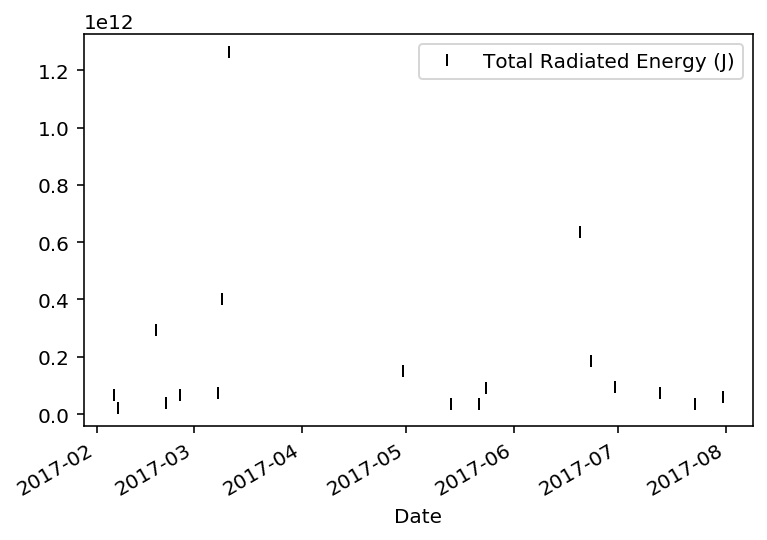

In [15]:
exmpl2.plot(x='Date',y='Total Radiated Energy (J)',style='k|')

#### 5. Удалить строки данных, в которых для метеоритов не указана скорость.

In [16]:
def isNaN(num):
    return num != num

In [17]:
fifth_paragraph = pd.read_csv('cneos_fireball_data.csv')
fifth_paragraph = fifth_paragraph.drop(fifth_paragraph[isNaN(fifth_paragraph.vx)].index)
fifth_paragraph

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.12
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.23
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.29
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.52
5,2017-06-20 13:41:32,54.2S,133.0E,33.3,13.6,8.7,-5.7,8.8,6.360000e+11,1.60
...,...,...,...,...,...,...,...,...,...,...
450,2004-04-22 04:21:49,44.3S,83.3E,29.6,16.3,8.5,-12.1,-6.8,6.240000e+11,1.50
451,2004-04-06 03:24:49,12.0S,162.8E,35.0,25.6,10.5,-23.2,-2.9,4.330000e+11,1.10
462,2003-11-10 13:54:06,64.5S,136.2E,23.0,20.1,14.8,-8.7,10.4,5.180000e+11,1.30
467,2003-09-27 12:59:02,21.0N,86.6E,26.0,18.2,-1.0,-5.4,-17.3,2.150000e+12,4.60


#### 6. Построить график, на котором по оси ОХ отложено время суток, по OY – частота появления метеоритов.

In [20]:
fourth_paragraph = pd.read_csv("cneos_fireball_data.csv", parse_dates=[0], infer_datetime_format=True)
temp = pd.DatetimeIndex(fourth_paragraph['Peak Brightness Date/Time (UT)']) 
fourth_paragraph['Date'] = temp.date 
fourth_paragraph['Time'] = temp.time 
del fourth_paragraph['Peak Brightness Date/Time (UT)'] 
fourth_paragraph

,Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),Date,Time
0,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.190,2017-07-31,22:01:35
1,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.120,2017-07-23,06:12:38
2,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.230,2017-07-13,09:30:36
3,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.290,2017-06-30,14:26:45
4,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.520,2017-06-23,20:21:55
...,...,...,...,...,...,...,...,...,...,...,...
714,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092,1993-11-29,17:48:41
715,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130,1993-10-31,03:39:27
716,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400,1991-10-04,09:22:47
717,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200,1990-10-01,03:51:47


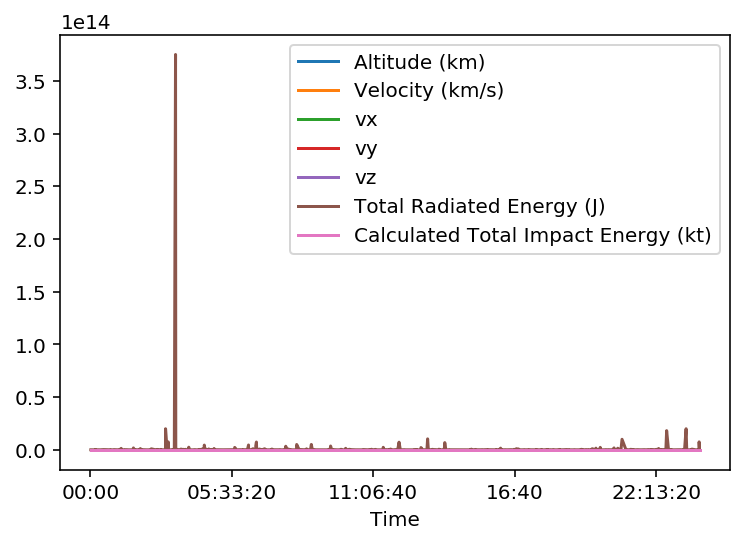

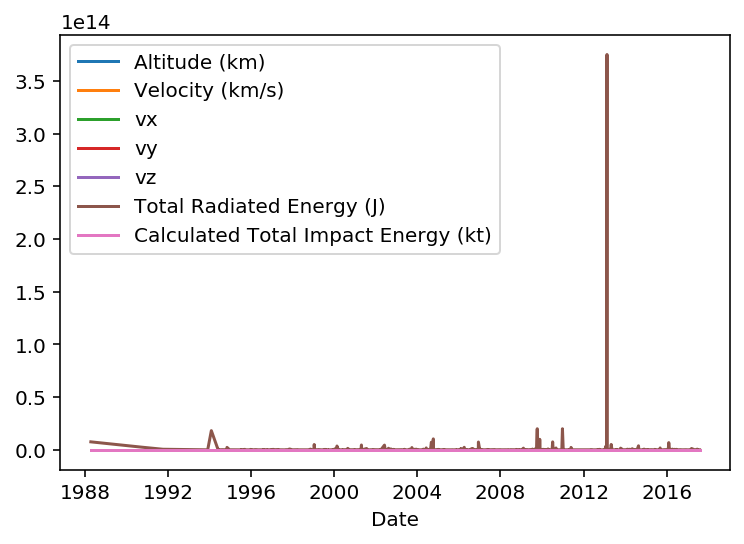

In [21]:
fourth_paragraph.set_index('Time').plot()
fourth_paragraph.plot(x='Date')
plt.show()

#### 7. Заполните строки в которых для метеоритов не указана скорость.

In [14]:
exmpl7 = pd.read_csv("cneos_fireball_data.csv", parse_dates=[0], infer_datetime_format=True)
temp = pd.DatetimeIndex(exmpl7['Peak Brightness Date/Time (UT)']) 
exmpl7['Date'] = temp.date 
exmpl7['Time'] = temp.time 
del exmpl7['Peak Brightness Date/Time (UT)'] 
exmpl7

,Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),Date,Time
0,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.190,2017-07-31,22:01:35
1,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.120,2017-07-23,06:12:38
2,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.230,2017-07-13,09:30:36
3,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.290,2017-06-30,14:26:45
4,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.520,2017-06-23,20:21:55
...,...,...,...,...,...,...,...,...,...,...,...
714,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092,1993-11-29,17:48:41
715,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130,1993-10-31,03:39:27
716,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400,1991-10-04,09:22:47
717,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200,1990-10-01,03:51:47


In [15]:
seventh_paragraph = exmpl7.fillna(5)
seventh_paragraph

,Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),Date,Time
0,24.7N,118.5W,5.0,5.0,5.0,5.0,5.0,5.800000e+10,0.190,2017-07-31,22:01:35
1,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.120,2017-07-23,06:12:38
2,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.230,2017-07-13,09:30:36
3,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.290,2017-06-30,14:26:45
4,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.520,2017-06-23,20:21:55
...,...,...,...,...,...,...,...,...,...,...,...
714,26.5N,78.3E,5.0,5.0,5.0,5.0,5.0,2.600000e+10,0.092,1993-11-29,17:48:41
715,51.3N,100.9W,5.0,5.0,5.0,5.0,5.0,4.000000e+10,0.130,1993-10-31,03:39:27
716,78.7N,6.3E,5.0,5.0,5.0,5.0,5.0,5.500000e+11,1.400,1991-10-04,09:22:47
717,7.5N,142.8E,5.0,5.0,5.0,5.0,5.0,2.500000e+12,5.200,1990-10-01,03:51:47


#### 8. Определить месяц года, для которого появление метеоритов наиболее вероятно (построить необходимые графики).

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
num = fourth_paragraph
num.drop(['Latitude (deg.)', 'Longitude (deg.)', 'Altitude (km)','Velocity (km/s)','vx','vy','vz'],inplace=True,axis=1)
num

,Total Radiated Energy (J),Calculated Total Impact Energy (kt),Date,Time
0,5.800000e+10,0.190,2017-07-31,22:01:35
1,3.500000e+10,0.120,2017-07-23,06:12:38
2,7.300000e+10,0.230,2017-07-13,09:30:36
3,9.400000e+10,0.290,2017-06-30,14:26:45
4,1.840000e+11,0.520,2017-06-23,20:21:55
...,...,...,...,...
714,2.600000e+10,0.092,1993-11-29,17:48:41
715,4.000000e+10,0.130,1993-10-31,03:39:27
716,5.500000e+11,1.400,1991-10-04,09:22:47
717,2.500000e+12,5.200,1990-10-01,03:51:47


In [5]:
num["Date"] = num["Date"].astype("datetime64")

In [6]:
eighth_paragraph = num.loc[0:17]
eighth_paragraph.head()

,Total Radiated Energy (J),Calculated Total Impact Energy (kt),Date,Time
0,5.800000e+10,0.19,2017-07-31,22:01:35
1,3.500000e+10,0.12,2017-07-23,06:12:38
2,7.300000e+10,0.23,2017-07-13,09:30:36
3,9.400000e+10,0.29,2017-06-30,14:26:45
4,1.840000e+11,0.52,2017-06-23,20:21:55


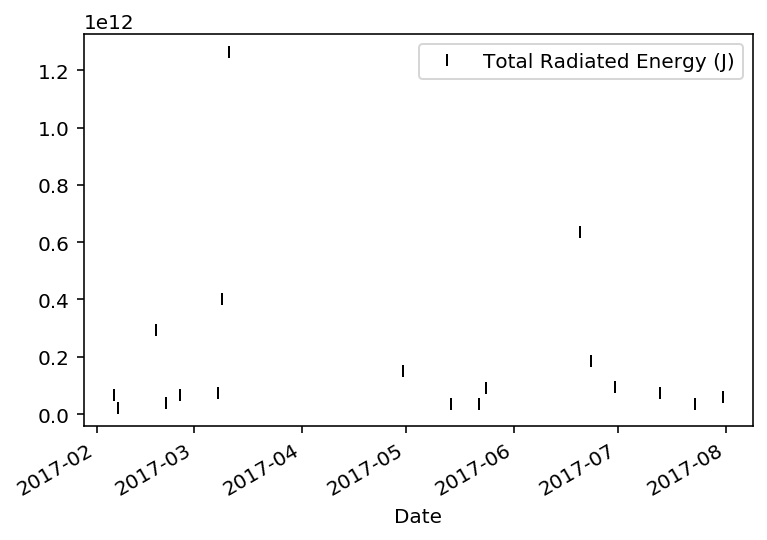

In [7]:
eighth_paragraph.plot(x='Date',y='Total Radiated Energy (J)',style='k|')

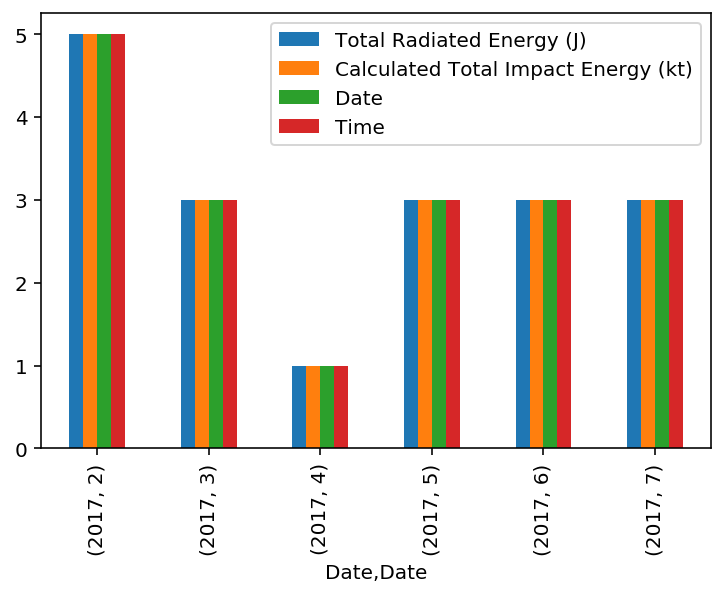

In [9]:
eighth_paragraph.groupby([eighth_paragraph["Date"].dt.year, eighth_paragraph["Date"].dt.month]).count().plot(kind="bar")